## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Calculating the S-matrix (frequency domain)

### Interconnect data

In [2]:
df_ic = pd.read_csv("InterconnectCrow/time_domain_wl_sweep_num_rings_sweep/time_domain_3000_wl_sweep_num_rings_sweep.csv").set_index("# rings / # wavelenths")
df_icf = pd.read_csv("InterconnectCrow/frequency_domain_single_wl_num_rings_sweep/frequency_domain_single_wl_num_rings_sweep.csv")

### Caphe data

In [3]:
df_caphe = pd.read_csv("CapheCrow/time_domain_wl_sweep_num_rings_sweep/time_domain_3000_wl_sweep_num_rings_sweep.csv").set_index("# rings / # wavelenths")
df_caphef = pd.read_csv("CapheCrow/frequency_domain_single_wl_num_rings_sweep/frequency_domain_single_wl_num_rings_sweep.csv")

### Photontorch data

In [4]:
df_pt = pd.read_csv("PhotontorchCrow/time_domain_wl_sweep_num_rings_sweep/time_domain_3000_wl_sweep_num_rings_sweep.csv").set_index("# rings / # wavelenths")
df_ptc = pd.read_csv("PhotontorchCrow/time_domain_wl_sweep_num_rings_sweep/time_domain_3000_wl_sweep_num_rings_sweep_cuda.csv").set_index("# rings / # wavelenths")
df_ptb = pd.read_csv("PhotontorchCrow/time_domain_wl_sweep_num_rings_sweep/time_domain_3000_batch_sweep_num_rings_sweep.csv").set_index("# rings")
df_ptcb = pd.read_csv("PhotontorchCrow/time_domain_wl_sweep_num_rings_sweep/time_domain_3000_batch_sweep_num_rings_sweep_cuda.csv").set_index("# rings")
df_ptf = pd.read_csv("PhotontorchCrow/frequency_domain_single_wl_num_rings_sweep/frequency_domain_single_wl_num_rings_sweep.csv")
df_ptcf = pd.read_csv("PhotontorchCrow/frequency_domain_single_wl_num_rings_sweep/frequency_domain_single_wl_num_rings_sweep_cuda.csv")

### Visualize

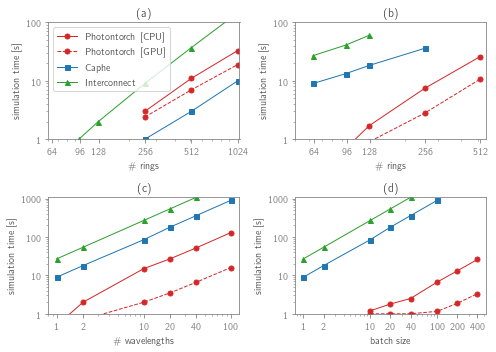

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(7,5))

plt.sca(ax[0,0])
plt.loglog(df_ptf["# rings"][4:], df_ptf["simulation time"][4:], marker="o", label="Photontorch [CPU]")
plt.plot(df_ptcf["# rings"][4:], df_ptcf["simulation time"][4:], marker="o", label="Photontorch [GPU]", color="C0", ls="--")
plt.plot(df_caphef["# rings"][4:], df_caphef["simulation time"][4:], marker="s", label="Caphe")
plt.plot(df_icf["# rings"][1:], df_icf["simulation time"][1:], marker="^", label="Interconnect")
plt.xlabel("\# rings")
plt.ylabel("simulation time [s]")
plt.yticks([1,10,100],["1","10","100"])
plt.ylim(1, 100)
plt.xticks([1,64,96,128,256,512,1024], ["1","64","96","128","256","512","1024"])
plt.xlim(60, 1050)
plt.legend()
plt.title("(a)")

plt.sca(ax[0,1])
plt.loglog(df_pt.index[1:], df_pt.iloc[1:,0], marker="o", label="Photontorch [CPU]")
plt.plot(df_ptc.index[1:], df_ptc.iloc[1:,0], marker="o", label="Photontorch [GPU]", color="C0", ls="--")
plt.plot(df_caphe.index[1:-1], df_caphe.iloc[1:-1,0], marker="s", label="Caphe")
plt.plot(df_ic.index[1:], df_ic.iloc[1:,0], marker="^", label="Interconnect")
plt.xlabel("\# rings")
plt.ylabel("simulation time [s]")
plt.ylim(1,100)
plt.yticks([1,10,100],["1","10","100"])
plt.xticks([1,64,96,128,256,512], ["1","64","96","128","256","512"])
plt.xlim(50,550)
plt.xlabel("\# rings")
plt.ylabel("simulation time [s]")
plt.title("(b)")

plt.sca(ax[1,0])
x = [float(x) for x in df_pt.loc[63].index.values]
plt.loglog(x, df_pt.loc[63], label="Photontorch [CPU]", marker="o", linestyle="-")
plt.plot(x, df_ptc.loc[63], label="Photontorch [CPU]", color="C0", marker="o", linestyle="--")
plt.plot(x, df_caphe.loc[63], label="Caphe", marker="s", linestyle="-")
plt.plot(x, df_ic.loc[63], label="Interconnect", marker="^", linestyle="-")
plt.ylim(1,1100)
plt.yticks([1,10,100,1000],["1","10","100","1000"])
plt.xticks([1,2,10,20,40,100], ["1","2","10","20","40","100"])
plt.xlabel("\# wavelengths")
plt.ylabel("simulation time [s]")
plt.title("(c)")

plt.sca(ax[1,1])
x0 = [float(x) for x in df_ptb.loc[63].index.values]
x1 = [float(x) for x in df_pt.loc[63].index.values]
plt.loglog(x0[2:], df_ptb.loc[63][2:], label="Photontorch [CPU]", marker="o", linestyle="-")
plt.plot(x0[2:], df_ptcb.loc[63][2:], label="Photontorch [CPU]", color="C0", marker="o", linestyle="--")
plt.plot(x1, df_caphe.loc[63], label="Caphe", marker="s", linestyle="-")
plt.plot(x1, df_ic.loc[63], label="Interconnect", marker="^", linestyle="-")
plt.ylim(1,1100)
plt.yticks([1,10,100,1000],["1","10","100","1000"])
plt.xticks([1,2,10,20,40,100,200,400], ["1","2","10","20","40","100","200","400"])
plt.xlabel("batch size")
plt.ylabel("simulation time [s]")
plt.title("(d)")


plt.tight_layout()
plt.show()